In [1]:
import matplotlib
import pandas
import seaborn

In [2]:
seaborn.set()

In [3]:
from pubg.deaths import (definitions as pubg_death_definitions, 
                         io as pubg_deaths_io)
from pubg.deaths.api import transforms as pubg_deaths_api_transforms


In [4]:
df = pandas.read_csv(
    '../data/enriched/deaths/kills_with_distances_0.csv',
    index_col=0,
    encoding='utf-8',
)

df = df[
    (df[pubg_death_definitions.MAPNAME] == 'ERANGEL') 
]

/home/mkilian/workspace/pubg_deaths/venv/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
df

,killed_by,killer_name,killer_placement,map,match_id,time,victim_name,victim_placement,killer_x_metres,killer_y_metres,victim_x_metres,victim_y_metres,kill_distance
179,Down and Out,Malcolm_x,9.0,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1035,Relugar,22.0,4969,3125,4973,3315,190.042101
180,M16A4,Malcolm_x,9.0,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1035,LiPoBattery,22.0,4969,3125,4978,3319,194.208651
181,AKM,G_Berg,7.0,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1422,cornsour,16.0,4604,4147,4598,4144,6.708204
182,AKM,Lukesnake17,20.0,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1210,Homebrw,9.0,4880,3472,4874,3476,7.211103
183,SKS,AlooGobi,2.0,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1818,Powfa,3.0,5010,4250,4930,4344,123.434193
184,M416,Powfa,3.0,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1766,kittykat6,6.0,4955,4298,4957,4383,85.023526
185,Down and Out,Snowzcone,44.0,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,92,GoochSlapper69,49.0,4661,6422,4662,6410,12.041595
186,M416,DevilBlood35,1.0,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1579,Malcolm_x,9.0,5120,4502,5098,4379,124.951991
188,S1897,MaelstromPhoenix,14.0,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,105,df434,46.0,4465,6215,4466,6210,5.099020
189,M416,AlooGobi,2.0,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1881,drphildidurmom,3.0,5031,4333,4980,4374,65.436993


/home/mkilian/workspace/pubg_deaths/venv/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


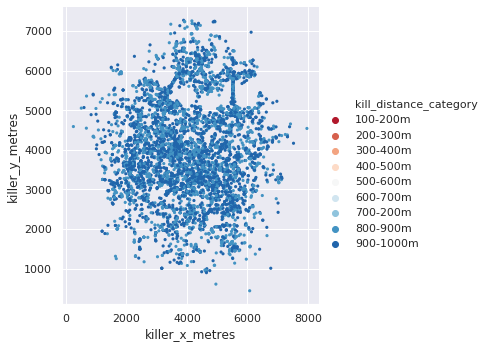

In [11]:
kill_distance_categories = {
    1: '100-200m',
    2: '200-300m',
    3: '300-400m',
    4: '400-500m',
    5: '500-600m',
    6: '600-700m',
    7: '700-200m',
    8: '800-900m',
    9: '900-1000m',
}

long_range_kills = df[
    (df[pubg_death_definitions.KILL_DISTANCE] >= 800) & 
    (df[pubg_death_definitions.KILL_DISTANCE] < 1000)
]

long_range_kills['kill_distance_category'] = (
    long_range_kills[pubg_death_definitions.KILL_DISTANCE]
    .apply(lambda d: kill_distance_categories[d // 100])
)

grid = seaborn.relplot(
    data=long_range_kills,
    x=pubg_death_definitions.KILLER_X,
    y=pubg_death_definitions.KILLER_Y,
    hue='kill_distance_category',
    hue_order=sorted(kill_distance_categories.values()),
    palette='RdBu',
    s=10,
    linewidth=0
)

In [12]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../data/erangel.png')


grid.ax.imshow(img, extent=(0, 8000, 0, 8000))

In [13]:
grid.fig.set_size_inches(50, 50)
grid.savefig('erangel_800_plus.png')